### Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

### Importing dataset

In [2]:
data = pd.read_csv("C:\\Users\\student\\Desktop\\Machine learning\\week6\\PCA\\iris.csv").drop("species",axis=1)
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Scalling

In [3]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

### PCA 

In [4]:
pca = PCA(n_components=2)
result = pca.fit_transform(scaled_data)

### 2D Visualization of Transformed data

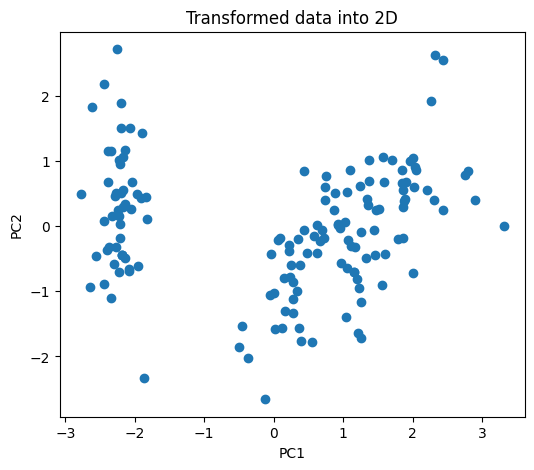

In [5]:
plt.figure(figsize=(6,5))
plt.scatter(result[:,0], result[:,1])
plt.title("Transformed data into 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

### Creating Dendrogram

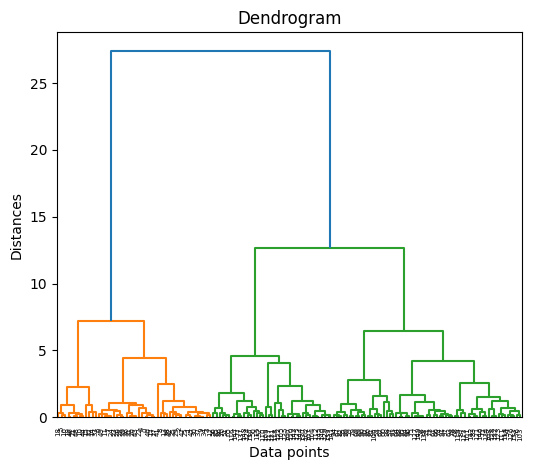

In [6]:
linkage1 = linkage(result, method = "ward", metric='euclidean')
linkage2 = linkage(scaled_data, method = "ward", metric= 'euclidean')
plt.figure(figsize=(6,5))
dendrogram(linkage1)
plt.title("Dendrogram")
plt.xlabel("Data points")
plt.ylabel("Distances")
plt.show()

### Model training

In [7]:
clusters = 2
model = AgglomerativeClustering(n_clusters=clusters, linkage="ward", metric='euclidean')
labels = model.fit_predict(result)

### Visualizing the clusters

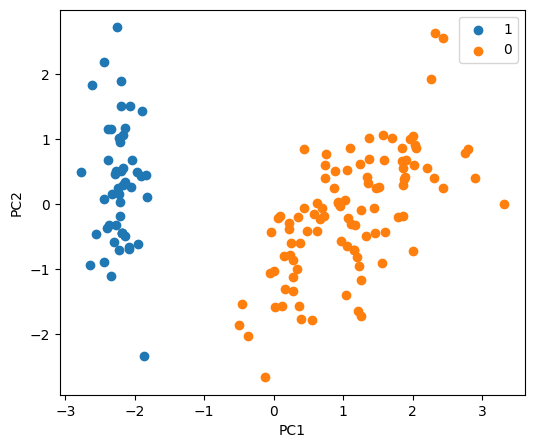

In [8]:
plt.figure(figsize=(6,5))
plt.scatter(result[labels == 1,0], result[labels == 1,1], label = "1")
plt.scatter(result[labels == 0,0], result[labels == 0,1], label = "0")
plt.legend()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()